# Self driving simulation

## Train model
This has already been Done

In [ ]:
from utils import *
### STEP 1
path ='myData'
data=importDataInfo(path)

### STEP 2
balanceData(data,display=False)

### STEP 3
imagesPath,steering=loadData(path,data)
#print(imagesPath[0],steering[0])

### STEP 4
xTrain,xVal,yTrain,yVal=train_test_split(imagesPath,steering,test_size=0.2,random_state=5)
print('Total Training Images: ',len(xTrain))
print('Total Validation Images: ',len(xVal))


#### STEP 8 
model=createModel()
model.summary()

#### STEP 9
history=model.fit(batchGen(xTrain,yTrain,100,True),steps_per_epoch=300,epochs=10,validation_data=batchGen(xVal,yVal,100,False),validation_steps=200)

#### STEP 10
model.save('model.h5')
print('Model Saved')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


## Understanding the model

In [1]:
from utils import *
model=createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

## Testing the model

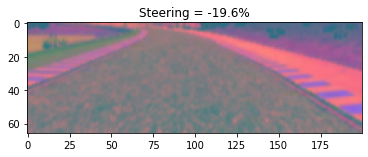

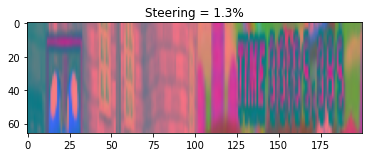

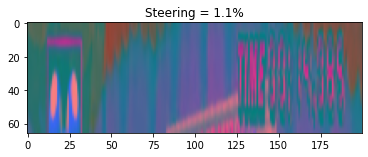

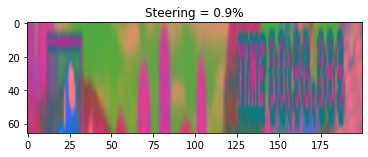

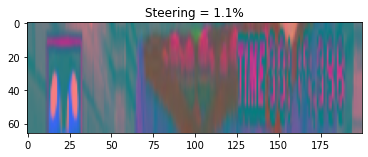

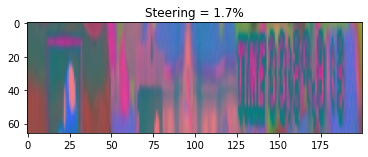

In [4]:
from utils import *
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

def preProcess(img):
    # plt.imshow(img)
    # plt.show()
    #img = img[60:135,:,:]
    img = img[250:650,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))



    #img = img/255

    return img

for test_image in os.listdir('test_data'):
    image = mpimg.imread(os.path.join('test_data',test_image))
    image = preProcess(image)


    steering = float(model.predict(np.array([image/255]))) # Steering is a percentage
    plt.title(f'Steering = {round(steering*100,1)}%')
    plt.imshow(image)
    plt.show()
    #print(steering)



## Now lets run the model

In [1]:
from utils import *
import socketio
import eventlet

from flask import Flask
from tensorflow.keras.models import load_model
import base64
from io import BytesIO
from PIL import Image
 
#### FOR REAL TIME COMMUNICATION BETWEEN CLIENT AND SERVER
sio = socketio.Server()
#### FLASK IS A MICRO WEB FRAMEWORK WRITTEN IN PYTHON
app = Flask(__name__)  # '__main__'
 
maxSpeed = 10

def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
 
 
@sio.on('telemetry')
def telemetry(sid, data):
    speed = float(data['speed'])
    image = Image.open(BytesIO(base64.b64decode(data['image'])))
    image = np.asarray(image)
    image = preProcess(image)
    
    image = np.array([image])
    steering = float(model.predict(image))
    throttle = 1.0 - speed / maxSpeed
    print(f'Steering = {steering}, Throttle = {throttle}, Speed = {speed}')
    sendControl(steering, throttle)
 
 
@sio.on('connect')
def connect(sid, environ):
    print('Connected')
    sendControl(0, 0)
 
 
def sendControl(steering, throttle):
    sio.emit('steer', data={
        'steering_angle': steering.__str__(),
        'throttle': throttle.__str__()
    })
 
 
if __name__ == '__main__':
    model = load_model('my_model.h5')
    app = socketio.Middleware(sio, app)
    ### LISTEN TO PORT 4567
    eventlet.wsgi.server(eventlet.listen(('', 4567)), app)









(18732) wsgi starting up on http://0.0.0.0:4567
(18732) accepted ('127.0.0.1', 55240)


Connected
Steering = -0.07479425519704819, Throttle = 0.8686, Speed = 1.314
Steering = -0.06868930906057358, Throttle = 0.8248, Speed = 1.752
Steering = -0.0705438107252121, Throttle = 0.8248, Speed = 1.752
Steering = -0.09161966294050217, Throttle = 0.8313699999999999, Speed = 1.6863
Steering = -0.07126090675592422, Throttle = 0.92133, Speed = 0.7867
Steering = -0.06188684701919556, Throttle = 0.93126, Speed = 0.6874
Steering = -0.06376820802688599, Throttle = 0.88168, Speed = 1.1832
Steering = -0.07154466956853867, Throttle = 0.8368, Speed = 1.632
Steering = -0.0686589702963829, Throttle = 0.79296, Speed = 2.0704
Steering = -0.06193094700574875, Throttle = 0.72837, Speed = 2.7163
Steering = -0.07131125777959824, Throttle = 0.67242, Speed = 3.2758
Steering = -0.08293750137090683, Throttle = 0.62759, Speed = 3.7241
Steering = -0.08234935998916626, Throttle = 0.56728, Speed = 4.3272
Steering = -0.08961249887943268, Throttle = 0.50677, Speed = 4.9323
Steering = -0.09483028948307037, Thro

127.0.0.1 - - [27/Aug/2021 17:51:02] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 112.916741
